## Наивный байесовский классификатор

In [1]:
import torch

In [2]:
device=torch.device('cuda')

In [3]:
import matplotlib.pyplot as plt

In [4]:
import torchvision

In [5]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze(axis=-1)

In [6]:
mnist_train = torchvision.datasets.MNIST('.', train=True, transform=transform, download=True)
mnist_test  = torchvision.datasets.MNIST('.', train=False, transform=transform, download=True)
#mnist_train = torchvision.datasets.MNIST(train=True, transform=transform, download=True)
#mnist_test  = torchvision.datasets.MNIST(train=False, transform=transform, download=True)

In [7]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [8]:
#mnist_train[0][0].shape 
mnist_train[0][1]

5

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#mnist_train[0][0]

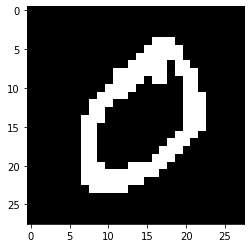

In [11]:
plt.imshow(mnist_train[1][0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)

In [12]:
import numpy as np

In [ ]:
#создаю датасет из нулей и единиц

In [13]:
Ones=torch.tensor([0.])
Zeros=torch.tensor([0.])
for i, X in enumerate(mnist_train):
    if X[1]==1: 
        if len(Ones)==1:
            Ones=X[0]
        elif Ones.shape==torch.Size([784]):
            #print(X[1], Ones.shape, X[0].shape)
            Ones=torch.stack((Ones, X[0]))
        else:            
            #print(X[1], Ones.shape, X[0].reshape(1,784).shape)
            Ones=torch.cat((Ones, X[0].reshape(1,784)), dim=0)
            
    if X[1]==0: 
        if len(Zeros)==1:
            Zeros=X[0]
        elif Zeros.shape==torch.Size([784]):
            #print(X[1], Zeros.shape, X[0].shape)
            Zeros=torch.stack((Zeros, X[0]))
        else:
            #print(X[1], Zeros.shape, X[0].shape)
            Zeros=torch.cat((Zeros, X[0].reshape(1,784)), dim=0)   
    #print(i, X[0].shape, X[1])
Zeros.shape, Ones.shape

(torch.Size([5923, 784]), torch.Size([6742, 784]))

In [14]:
X_train=torch.cat((Ones, Zeros), dim=0)
#Y_train=torch.stack((torch.ones(5923), torch.zeros(6742)))
Y_train=torch.cat((torch.ones(6742), torch.zeros(5923)), dim=0)

In [15]:
#Y_train.shape
X_train.shape, Y_train.shape

(torch.Size([12665, 784]), torch.Size([12665]))

In [16]:
P_Zeros=Zeros.shape[0]/(Ones.shape[0]+Zeros.shape[0])
P_Ones=Ones.shape[0]/(Ones.shape[0]+Zeros.shape[0])
P_Zeros, P_Ones

(0.46766679826292934, 0.5323332017370707)

In [17]:
P_x_Zeros=Zeros.mean(axis=0)


P_x_Ones=Ones.mean(axis=0)
P_x_Zeros.shape, P_x_Ones.shape
#P_x_Ones+P_x_Zeros

(torch.Size([784]), torch.Size([784]))

In [18]:
mnist_test[2][1]

1

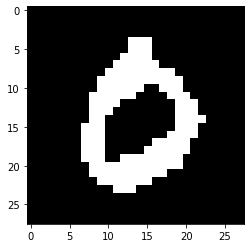

In [19]:
plt.imshow(mnist_test[3][0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)

In [20]:
def ones_prob(X):
    ln_P_x=0
    for i, x_i in enumerate(X[X>0]):
        ln_P_x+=np.log(P_x_Ones[X>0][i]/P_x_Zeros[X>0][i])
    ex=np.exp(np.log(P_Ones/P_Zeros)+ln_P_x)
    P_Ones_condit_pic=ex/(1+ex)
    return ln_P_x, ex, P_Ones_condit_pic

In [21]:
ln_P_x, ex, P_Ones_condit_pic=ones_prob(mnist_test[3][0])
ln_P_x, ex, P_Ones_condit_pic.item()

(tensor(-386.9327), tensor(0.), 0.0)

In [22]:
ln_P_x, ex, P_Ones_condit_pic=ones_prob(mnist_test[2][0])
ln_P_x, ex, P_Ones_condit_pic.item()

(tensor(50.8097), tensor(1.3262e+22), 1.0)

In [23]:
ln_P_x, ex, P_Ones_condit_pic=ones_prob(mnist_test[956][0])
ln_P_x, ex, P_Ones_condit_pic.item(), P_Ones_condit_pic.item()==np.inf

(tensor(inf), tensor(inf), nan, False)

In [24]:
ln_P_x.item()==np.inf

True

In [25]:
def isNaN(x):
    if x!=x:
        return True
    else:
        return False

In [26]:
y_true=[]
y_pred=[]
for i, X in enumerate(mnist_test):
    if X[1] in [0,1]: 
        prob=ones_prob(X[0])[2].item()
        ln_P_x=ones_prob(X[0])[0].item()
        #print(i, prob, X[1])
        y_true.append(X[1])
        if ln_P_x==np.inf:
            y_pred.append(1)
        elif isNaN(ln_P_x):
            y_pred.append(2)
        else:
            y_pred.append(round(prob))

C:\Users\zamarseny\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [27]:
len(y_true), len(y_pred)#, isNaN(ln_P_x), np.nan

(2115, 2115)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_true, y_pred)

0.9791962174940898

In [30]:
# теперь sklearn

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
gnb = GaussianNB()

In [32]:
Ones=torch.tensor([0.])
Zeros=torch.tensor([0.])
for i, X in enumerate(mnist_test):
    if X[1]==1: 
        if len(Ones)==1:
            Ones=X[0]
        elif Ones.shape==torch.Size([784]):
            #print(X[1], Ones.shape, X[0].shape)
            Ones=torch.stack((Ones, X[0]))
        else:            
            #print(X[1], Ones.shape, X[0].reshape(1,784).shape)
            Ones=torch.cat((Ones, X[0].reshape(1,784)), dim=0)
            
    if X[1]==0: 
        if len(Zeros)==1:
            Zeros=X[0]
        elif Zeros.shape==torch.Size([784]):
            #print(X[1], Zeros.shape, X[0].shape)
            Zeros=torch.stack((Zeros, X[0]))
        else:
            #print(X[1], Zeros.shape, X[0].shape)
            Zeros=torch.cat((Zeros, X[0].reshape(1,784)), dim=0)   
    #print(i, X[0].shape, X[1])
Zeros.shape, Ones.shape

(torch.Size([980, 784]), torch.Size([1135, 784]))

In [33]:
X_test=torch.cat((Ones, Zeros), dim=0)
#Y_train=torch.stack((torch.ones(5923), torch.zeros(6742)))
Y_test=torch.cat((torch.ones(1135), torch.zeros(980)), dim=0)

In [34]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(torch.Size([12665, 784]),
 torch.Size([12665]),
 torch.Size([2115, 784]),
 torch.Size([2115]))

In [35]:
y_pred = gnb.fit(X_train, Y_train).predict(X_test)
#y_pred = cnb.fit(X_train.numpy(), Y_train.numpy()).predict(X_test)

In [38]:
#for i in zip(Y_test, y_pred):
#    print(i)

In [37]:
accuracy_score(Y_test, y_pred)

0.992434988179669

In [ ]:
# У sklearn точность выше. 
# Решение про регрессию boston house pricing во второй ссылке